<a href="https://colab.research.google.com/github/fedyasa/Task2/blob/main/FedorSergeev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = (pd.read_csv('train_regression.csv', header = None).iloc[: ,:-1]).to_numpy()  
train_targets = (pd.read_csv('train_regression.csv', header = None).iloc[: ,-1]).to_numpy()  

test_data = (pd.read_csv('test_regression.csv', header = None)).to_numpy()

In [3]:
print(train_data.shape)
print(test_data.shape)

print(train_targets.shape)

(1000, 256)
(100, 256)
(1000,)


In [4]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [5]:
from keras import models
from keras import layers

In [6]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu',
                         input_shape = (train_data.shape[1], )))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

In [7]:
k = 5
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[: i * num_val_samples],
                                       train_data[(i + 1) * num_val_samples :]],
                                       axis = 0)
  partial_train_targets = np.concatenate([train_targets[: i * num_val_samples],
                                          train_targets[(i + 1) * num_val_samples :]],
                                          axis = 0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_targets),
                      epochs = num_epochs, batch_size = 10)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Выходные данные были обрезаны до нескольких последних строк (5000).
80/80 [==============================] - 0s 4ms/step - loss: 62.7301 - mae: 6.2337 - val_loss: 92.1843 - val_mae: 7.2219
Epoch 4/500
80/80 [==============================] - 0s 4ms/step - loss: 35.6942 - mae: 4.8645 - val_loss: 108.4502 - val_mae: 7.6565
Epoch 5/500
80/80 [==============================] - 0s 4ms/step - loss: 25.2486 - mae: 4.0930 - val_loss: 84.9150 - val_mae: 6.9311
Epoch 6/500
80/80 [==============================] - 0s 4ms/step - loss: 19.1777 - mae: 3.4925 - val_loss: 103.2022 - val_mae: 7.3841
Epoch 7/500
80/80 [==============================] - 0s 3ms/step - loss: 15.3098 - mae: 3.1387 - val_loss: 97.9928 - val_mae: 7.0972
Epoch 8/500
80/80 [==============================] - 0s 4ms/step - loss: 15.8065 - mae: 3.0087 - val_loss: 75.1086 - val_mae: 6.3312
Epoch 9/500
80/80 [==============================] - 0s 4ms/step - loss: 13.1034 - mae: 2.7842 - val_loss: 82.8536 - val_mae: 6.5086
Epoch 10/50

In [8]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

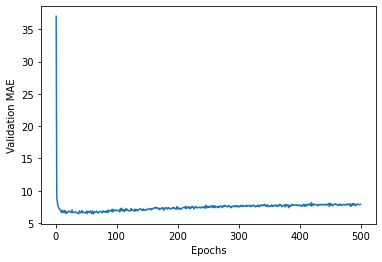

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
model = build_model()
model.fit(train_data, train_targets,
          epochs = 60, batch_size = 20)
test_targets = model.predict(test_data)

Epoch 1/60
50/50 [==============================] - 1s 3ms/step - loss: 4243.7339 - mae: 56.0288
Epoch 2/60
50/50 [==============================] - 0s 4ms/step - loss: 1850.2849 - mae: 35.7700
Epoch 3/60
50/50 [==============================] - 0s 3ms/step - loss: 229.6695 - mae: 11.0578
Epoch 4/60
50/50 [==============================] - 0s 3ms/step - loss: 62.7395 - mae: 5.9860
Epoch 5/60
50/50 [==============================] - 0s 3ms/step - loss: 40.1120 - mae: 4.9750
Epoch 6/60
50/50 [==============================] - 0s 3ms/step - loss: 28.3122 - mae: 4.2085
Epoch 7/60
50/50 [==============================] - 0s 3ms/step - loss: 19.4357 - mae: 3.5054
Epoch 8/60
50/50 [==============================] - 0s 3ms/step - loss: 14.5988 - mae: 3.0768
Epoch 9/60
50/50 [==============================] - 0s 3ms/step - loss: 11.8291 - mae: 2.7619
Epoch 10/60
50/50 [==============================] - 0s 3ms/step - loss: 10.2685 - mae: 2.5540
Epoch 11/60
50/50 [==============================] 

In [28]:
pd.DataFrame(test_targets).to_csv("/content/%Fedor_%Sergeev_regression.csv", header=None, index=None)

In [31]:
pd.DataFrame(test_targets)

,0
0,56.506821
1,38.182434
2,48.387691
3,127.214394
4,103.713509
...,...
95,47.730164
96,71.303566
97,52.007595
98,22.866428
